In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('TA_Training_Set.csv',delimiter=',',encoding='latin-1')
df = df[['Topic','Comment']][:900000]
df = df[pd.notnull(df['Comment'])]
df.rename(columns = {'Comment':'Comment'}, inplace = True)
df.head()

,Topic,Comment
0,21,Very hot and sexy nail color;)
1,28,"I know, right? Like, an FMEA. I definitely kno..."
2,5,"Hello, we only allow people with an account ag..."
3,2,Megumin reads das kapital??? New best girl.
4,13,Freedom of speech ? but you use a random anon ...


In [ ]:
Y_test1 = pd.read_csv('TestFileTemplate.csv',delimiter=',',encoding='latin-1')
Y_test1.head()

FileNotFoundError: ignored

In [ ]:
df2 = pd.read_csv('TA_Training_Set.csv',delimiter=',',encoding='latin-1')
labels = df2['Topic']
labels.head()

ParserError: ignored

In [ ]:
df.index = range(900000)
df['Comment'].apply(lambda x: len(x.split(' '))).sum()

26017767

In [ ]:
cnt_pro = df['Topic'].value_counts()
len(cnt_pro)

40

In [ ]:
def print_comment(index):
    example = df[df.index == index][['Comment', 'Topic']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Comment:', example[1])
print_comment(12)

Your submission appears to be a screenshot of a social media post or a text conversation â a violation of [Rule 10](https://www.reddit.com/r/funny/wiki/rules#wiki_10._no_sms_or_social_media_content_.28including_reddit.29.) â and has therefore been removed. If you feel this removal was done in error, you may contact the subredditâs moderators for manual appraisal.
Comment: 18


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Comment'] = df['Comment'].apply(cleanText)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.youtube.com/watch?v=vclyI-KGhbo

https://www.youtube.com/watch?v=_T2uEURSaio

https://www.youtube.com/watch?v=xmmjhXtrhLA

https://www.youtube.com/watch?v=41IpvOHlLew" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://youtu.be/qFV7UsAnvUA

https://streamable.com/wdeji

https://streamable.com/m30yz

https://streamable.com/oqs0n

https://streamable.com/waqlr

https://streamable.com/of1i

https://youtu.be/vLm55oWkVqE" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Sou

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Comment']), tags=[r.Topic]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Comment']), tags=[r.Topic]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Comment'].values)
X = tokenizer.texts_to_sequences(df['Comment'].values)
X = pad_sequences(X)

In [ ]:
#X = tokenizer.texts_to_sequences(df['Comment'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (900000, 50)


In [ ]:
train_tagged.values

array([TaggedDocument(words=['how', 'about', 'a', 'kabuki', '?'], tags=[31]),
       TaggedDocument(words=['in', 'my', 'opinion', ',', 'she', 'shouldve', 'paid', 'her', 'own', '.'], tags=[1]),
       TaggedDocument(words=['hello', '/u/berkinator711', '!', 'unfortunately', ',', 'your', 'post', 'has', 'been', 'removed', '.', 'to', 'protect', 'the', 'subreddit', 'from', 'spam', ',', 'we', 'no', 'longer', 'allow', 'new/inactive', 'users', 'to', 'make', 'submissions', ',', 'you', 'need', 'to', 'build', 'up', 'some', 'link', 'and', 'comment', 'karma', 'and', 'history', '.', 'in', 'the', 'mean', 'time', ',', 'please', 'be', 'sure', 'to', 'familiarize', 'yourself', 'with', 'our', 'sidebar', 'rules', ':', '>', '/r/memes/about/rules', '>', 'r/memes/about/sidebar', 'we', 'ask', 'you', 'to', 'participate', 'in', 'the', 'comment', 'sections', 'of', 'our', 'subreddit', 'to', 'build', 'up', 'the', 'karma', 'you', 'need', 'to', 'post', 'here', 'and', 'to', 'learn', 'the', 'rules', 'and', 'standards', 

In [ ]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 899999/899999 [00:00<00:00, 2704142.54it/s]


In [ ]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv.vocab)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.vectors_docs):
    while i in vec <= 1000:
          embedding_matrix[i]=vec

In [ ]:
from keras.backend import dropout
from keras.layers.recurrent import DropoutRNNCellMixin
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow import keras

# innitiate
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv.vocab) +1, 20, input_length=X.shape[1],weights=
                    [embedding_matrix],trainable=True))

model.add(LSTM(128, return_sequences=False))
model.add(Dense(50))
model.add(Dense(40, activation="softmax"))

# output model frame
model.summary()
model.compile(optimizer="adam", loss='CategoricalCrossentropy', metrics=['acc'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 50, 20)            6791780   
                                                                 
 lstm_18 (LSTM)              (None, 128)               76288     
                                                                 
 dense_23 (Dense)            (None, 50)                6450      
                                                                 
 dense_24 (Dense)            (None, 40)                2040      
                                                                 
Total params: 6,876,558
Trainable params: 6,876,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

Y = pd.get_dummies(df['Topic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(765000, 50) (765000, 40)
(135000, 50) (135000, 40)


# New Section

In [ ]:
Ylabels = df['Topic']
Ylabels

0         21
1         28
2          5
3          2
4         13
          ..
499995    23
499996     3
499997    11
499998    25
499999    11
Name: Topic, Length: 500000, dtype: int64

In [ ]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs=15, batch_size=batch_size, verbose = 2)

Epoch 1/15
23907/23907 - 395s - loss: 2.4044 - acc: 0.3480 - 395s/epoch - 17ms/step
Epoch 2/15
23907/23907 - 391s - loss: 1.9767 - acc: 0.4635 - 391s/epoch - 16ms/step
Epoch 3/15
23907/23907 - 390s - loss: 1.7796 - acc: 0.5153 - 390s/epoch - 16ms/step
Epoch 4/15
23907/23907 - 392s - loss: 1.6159 - acc: 0.5595 - 392s/epoch - 16ms/step
Epoch 5/15
23907/23907 - 395s - loss: 1.5011 - acc: 0.5898 - 395s/epoch - 17ms/step
Epoch 6/15
23907/23907 - 391s - loss: 1.4285 - acc: 0.6084 - 391s/epoch - 16ms/step
Epoch 7/15
23907/23907 - 391s - loss: 1.3785 - acc: 0.6211 - 391s/epoch - 16ms/step
Epoch 8/15
23907/23907 - 391s - loss: 1.3393 - acc: 0.6309 - 391s/epoch - 16ms/step
Epoch 9/15
23907/23907 - 392s - loss: 1.3070 - acc: 0.6397 - 392s/epoch - 16ms/step
Epoch 10/15
23907/23907 - 390s - loss: 1.2801 - acc: 0.6469 - 390s/epoch - 16ms/step
Epoch 11/15
23907/23907 - 389s - loss: 1.2561 - acc: 0.6532 - 389s/epoch - 16ms/step
Epoch 12/15
23907/23907 - 389s - loss: 1.2335 - acc: 0.6597 - 389s/epoch -

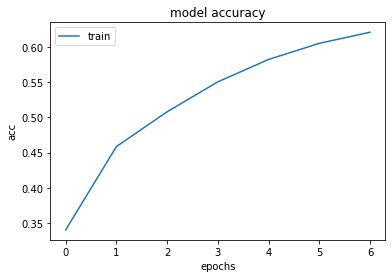

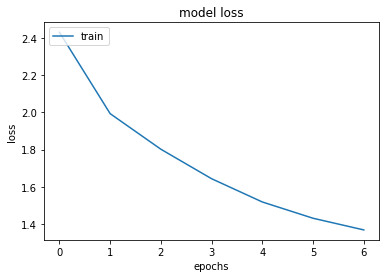

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

23907/23907 - 147s - loss: 1.2319 - acc: 0.6608 - 147s/epoch - 6ms/step
4219/4219 - 26s - loss: 2.3329 - acc: 0.4488 - 26s/epoch - 6ms/step
Train: 0.661, Test: 0.4488


In [ ]:
model.save('Mymodel.h5')

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set

predict_x=model.predict(X_test) 
yhat_classes = np.argmax(predict_x,axis=1)

#yhat_classes = (model.predict(X_test) > 0.5).astype("int32")
print(yhat_classes)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

[[2.33013351e-02 2.04908215e-02 1.54826799e-02 ... 3.13132978e-03
  1.56136695e-02 5.29881939e-03]
 [1.27065275e-02 1.37035698e-02 1.76755954e-02 ... 1.23351598e-02
  4.35024500e-02 6.91879764e-02]
 [8.69502034e-03 9.94806457e-03 2.68160887e-02 ... 1.29740149e-01
  6.64739229e-04 4.57752170e-03]
 ...
 [2.76863831e-03 5.26672695e-03 2.32813973e-02 ... 1.99983746e-01
  5.05637098e-03 2.34506316e-02]
 [1.15975790e-05 2.09026082e-04 1.77218718e-03 ... 2.29722988e-02
  6.57514920e-06 2.66074610e-04]
 [1.24741971e-04 2.12665386e-02 1.79620658e-03 ... 4.90424456e-04
  1.55689282e-04 3.83135884e-05]]
[ 5 30 16 ... 34 25  8]


In [ ]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([ 6, 30,  0, ..., 35, 18,  8])

In [ ]:
validation_size = 200

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

463/463 [==============================] - 4s 9ms/step - loss: 3.4210 - acc: 0.3334
score: 3.42
acc: 0.33


In [ ]:
model.save('Mymodel.h5')

In [ ]:
reconstructed_model = keras.models.load_model("Mymodel.h5")

In [ ]:
y_pred1 = model.predict(X_test)
print(y_pred1)
model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

[[2.33013351e-02 2.04908215e-02 1.54826799e-02 ... 3.13132978e-03
  1.56136695e-02 5.29881939e-03]
 [1.27065275e-02 1.37035698e-02 1.76755954e-02 ... 1.23351598e-02
  4.35024500e-02 6.91879764e-02]
 [8.69502034e-03 9.94806457e-03 2.68160887e-02 ... 1.29740149e-01
  6.64739229e-04 4.57752170e-03]
 ...
 [2.76863831e-03 5.26672695e-03 2.32813973e-02 ... 1.99983746e-01
  5.05637098e-03 2.34506316e-02]
 [1.15975790e-05 2.09026082e-04 1.77218718e-03 ... 2.29722988e-02
  6.57514920e-06 2.66074610e-04]
 [1.24741971e-04 2.12665386e-02 1.79620658e-03 ... 4.90424456e-04
  1.55689282e-04 3.83135884e-05]]
704/704 [==============================] - 6s 9ms/step - loss: 2.4759 - acc: 0.3634


[2.4759151935577393, 0.3634222149848938]

In [ ]:
Test_data = pd.read_csv('TA_Test_Set.csv')
Test_data

In [ ]:
Comment = Test_data['Comment']
seq = tokenizer.texts_to_sequences(Comment)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = df['Topic']
testpred = labels[np.argmax(pred)]
print(testpred)

21


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Comment = Test_data['Comment']
seq = tokenizer.texts_to_sequences(Comment)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = reconstructed_model.predict(padded)

lables = [i for i in range(40)]

In [ ]:
Test_data = pd.read_csv('TA_Test_Set.csv')
len(Test_data)

100000

In [ ]:
Comment1 = Test_data

for x in Comment:
  print(x)

Streaming output truncated to the last 5000 lines.
It isn't about the hard 20 hp on a kill. It's about the fact that it snowballs too hard playing aggressively. Even the backpacks super OP health item ability requires you to take cover to use it.

Ive always said the backpack ability should be split up.

Backpack: 50% faster health items.
Shield: 50% faster shield items.
That's for seasonal shows airing currently.
Why would it be up for a while my man
It was a spider
If you read through they where independent before joining the ottomans, they where pretty much a satellite state, the control of the ottomans was by name and alliance every other way they where there own country. The eastern block barely had autonomy at all. Maybe you can link me something that says otherwise?
My other comment aside, I completely agree with what you said. Also, thank you on behalf of all your patients for the emotional labor you provide. From the outside it’s easy to think it’s all just business to you, bu

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
What the hell? This sounds like a Netflix plot.
[Here he is telling a room full of business types that Whoppers come out cold unless you push the whopper button](https://www.youtube.com/watch?v=mOFXUx2jQ-Q)
Better late than never, and his vocals are awesome.
I'd get it if I was spamming but it was literally the second post I tried to make.

LOL, 70 downvotes. Why did they even post the WaPo article? I suppose their minions just look at the headline and not the substance
Its actually faster to hit it anyway. 1 snipe with a heavy also is a pretty quick way if you don't mind making some noise lol
I blame the parents.
Didn't see you back there ;p
Уже есть. Сегодня видел собранного на коленке бота для поиска баянов.
I never would have recognized him as the same actor. Bobby B what do you think of the Flintstones Movie now?
Soooooooooooooooo why didn't Mueller look into the foreign influence on the side of the Democrats? Hmmmmmmmmmmmmmmmmmmm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pred_list = []

#def iteratecomments( )
for x in Comment:
    seq = tokenizer.texts_to_sequences(Comment)
    padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)
    pred = model.predict(padded)
    labels = df['Topic']
    pred_targets = (labels[np.argmax(pred)])
    pred_list.append(pred_targets)

print(pred_list)

In [ ]:

# list of name, degree, score 
nme = ["Topics"] 
     
# dictionary of lists  
dict = {'Topics': nme}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('GFG.csv') 

In [ ]:
fields = ['Name'] 
    
# data rows of csv file 
columns = [['Nikhil', 'COE', '2', '9.0']] 
  
with open('GFG', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writercolumns(rows)

In [ ]:
Comment = Test_data['Comment']
seq = tokenizer.texts_to_sequences(Comment)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = df['Topic']
testpred = labels[np.argmax(pred)]
print(testpred)